In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



In [2]:
#empty list for holding the latitude & longitude combinations
lat_lngs = []

#emply list to hold city names
cities = []
# range of latitudes and longitudes 
lat_range = (-90,90)
lng_range = (-180,180)

#set of ranom lat and lng comibnations
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)
lat_lngs = zip(lats,lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
    
    
    # if the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count

print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code


In [3]:
url ="http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

#query_url = f"{url}appid={weather_api_key}&q={cities}"
#response = requests.get(query_url).json()
#response

# define an empty list to fetch the weather data for each city
city_data = []


#print the logger
print("Beginning Data Retrieval    ")
print("----------------------------")

#create counters 

record_count = 1 
set_count = 1

# loop thru all the cities in our list to fetch weather data 

for i, city, in enumerate(cities):
    
    
    #group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >=50):
        
        set_count += 1 
        record_count = 0 
    
#create endpoint URL with each city 

            
    print("Processing Record %s of set %s| %s" % (record_count,set_count,city))
        
    record_count += 1 
    # run an API request for each of the citites
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    responseJSON = requests.get(city_url).json()
    #print(city_url)
   # responseJSON = response.json()
    
        
    try:
        
          
        city_weather = responseJSON['main']['temp']
        city_lat = responseJSON['coord']['lat']
        city_lng = responseJSON['coord']['lon']
        city_max_temp = responseJSON['main']['temp_max']
        city_humidity = responseJSON['main']['humidity']
        city_clouds = responseJSON['clouds']['all']
        city_wind = responseJSON['wind']['speed']
        city_country = responseJSON['sys']['country']
        city_date = responseJSON['dt']
        
        
        city_data.append({"City": city,
                          
                          
                      
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
   
                          
    except:
                        
        print("City not found. Skipping...")
        pass
                          
                          

  

print("-----------------------------")

print("Data Retrieval Complete      ")
print("-----------------------------")
responseJSON     

Beginning Data Retrieval    
----------------------------
Processing Record 1 of set 1| puerto ayora
Processing Record 2 of set 1| namibe
Processing Record 3 of set 1| ushuaia
Processing Record 4 of set 1| hilo
Processing Record 5 of set 1| cape town
Processing Record 6 of set 1| mahebourg
Processing Record 7 of set 1| mataura
Processing Record 8 of set 1| qasigiannguit
Processing Record 9 of set 1| ormond beach
Processing Record 10 of set 1| rawson
Processing Record 11 of set 1| bambous virieux
Processing Record 12 of set 1| taolanaro
City not found. Skipping...
Processing Record 13 of set 1| lebu
Processing Record 14 of set 1| geraldton
Processing Record 15 of set 1| half moon bay
Processing Record 16 of set 1| kapaa
Processing Record 17 of set 1| busselton
Processing Record 18 of set 1| karaton
Processing Record 19 of set 1| qaanaaq
Processing Record 20 of set 1| punta arenas
Processing Record 21 of set 1| upernavik
Processing Record 22 of set 1| atuona
Processing Record 23 of set 1

Processing Record 41 of set 4| bandarbeyla
Processing Record 42 of set 4| alofi
Processing Record 43 of set 4| bredasdorp
Processing Record 44 of set 4| guerrero negro
Processing Record 45 of set 4| port moresby
Processing Record 46 of set 4| ilulissat
Processing Record 47 of set 4| wad rawah
Processing Record 48 of set 4| fort saint john
City not found. Skipping...
Processing Record 49 of set 4| zhigansk
Processing Record 0 of set 5| muskegon
Processing Record 1 of set 5| tsihombe
City not found. Skipping...
Processing Record 2 of set 5| roald
Processing Record 3 of set 5| ahipara
Processing Record 4 of set 5| khatanga
Processing Record 5 of set 5| elizabeth city
Processing Record 6 of set 5| scarborough
Processing Record 7 of set 5| kahului
Processing Record 8 of set 5| port hedland
Processing Record 9 of set 5| holme
Processing Record 10 of set 5| alice springs
Processing Record 11 of set 5| huntington
Processing Record 12 of set 5| eureka
Processing Record 13 of set 5| saint george

Processing Record 33 of set 8| kununurra
Processing Record 34 of set 8| hovd
Processing Record 35 of set 8| flin flon
Processing Record 36 of set 8| paita
Processing Record 37 of set 8| manati
Processing Record 38 of set 8| moron
Processing Record 39 of set 8| sobolevo
Processing Record 40 of set 8| oneonta
Processing Record 41 of set 8| santiago
Processing Record 42 of set 8| flinders
Processing Record 43 of set 8| baruun-urt
Processing Record 44 of set 8| pirgos
Processing Record 45 of set 8| kavaratti
Processing Record 46 of set 8| fohnsdorf
Processing Record 47 of set 8| dakar
Processing Record 48 of set 8| lolua
City not found. Skipping...
Processing Record 49 of set 8| laguna
Processing Record 0 of set 9| san miguel de cauri
Processing Record 1 of set 9| lac du bonnet
Processing Record 2 of set 9| katsuura
Processing Record 3 of set 9| saurimo
Processing Record 4 of set 9| kikwit
Processing Record 5 of set 9| coahuayana
Processing Record 6 of set 9| jacobina
Processing Record 7 o

Processing Record 25 of set 12| yerofey pavlovich
Processing Record 26 of set 12| russell
Processing Record 27 of set 12| honiara
Processing Record 28 of set 12| nerang
Processing Record 29 of set 12| skagastrond
City not found. Skipping...
Processing Record 30 of set 12| luang prabang
Processing Record 31 of set 12| viedma
Processing Record 32 of set 12| teahupoo
Processing Record 33 of set 12| saldanha
Processing Record 34 of set 12| bell ville
Processing Record 35 of set 12| tosya
Processing Record 36 of set 12| fethiye
Processing Record 37 of set 12| green river
Processing Record 38 of set 12| egvekinot
Processing Record 39 of set 12| fort nelson
Processing Record 40 of set 12| yining
Processing Record 41 of set 12| van buren
Processing Record 42 of set 12| itaituba
Processing Record 43 of set 12| sahrak
City not found. Skipping...
Processing Record 44 of set 12| inhambane
Processing Record 45 of set 12| doha
Processing Record 46 of set 12| rio gallegos
Processing Record 47 of set 

{'coord': {'lon': -54.3333, 'lat': -34.4833},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 22.96,
  'feels_like': 23.35,
  'temp_min': 22.96,
  'temp_max': 22.96,
  'pressure': 1009,
  'humidity': 78,
  'sea_level': 1009,
  'grnd_level': 1006},
 'visibility': 10000,
 'wind': {'speed': 4.61, 'deg': 345, 'gust': 10.14},
 'clouds': {'all': 100},
 'dt': 1677897285,
 'sys': {'country': 'UY', 'sunrise': 1677835584, 'sunset': 1677881555},
 'timezone': -10800,
 'id': 3440777,
 'name': 'Rocha',
 'cod': 200}

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.json_normalize(city_data)
city_data_df.head()
# Show Record Count

city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [16]:
#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,25.86,93,71,1.21,EC,1677896989
1,namibe,-15.1961,12.1522,19.42,79,1,3.08,AO,1677897051
2,ushuaia,-54.8000,-68.3000,2.81,93,100,6.17,AR,1677896981
3,hilo,19.7297,-155.0900,21.45,89,75,3.60,US,1677896976
4,cape town,-33.9258,18.4232,20.77,83,20,2.06,ZA,1677896993


In [17]:
#export the city_data to a csv

city_data_df.to_csv("output_data/cities.csv",index_label="City_ID")

city_data_df = pd.read_csv("output_data/cities.csv",index_col="City_ID")
# Display sample data

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,25.86,93,71,1.21,EC,1677896989
1,namibe,-15.1961,12.1522,19.42,79,1,3.08,AO,1677897051
2,ushuaia,-54.8000,-68.3000,2.81,93,100,6.17,AR,1677896981
3,hilo,19.7297,-155.0900,21.45,89,75,3.60,US,1677896976
4,cape town,-33.9258,18.4232,20.77,83,20,2.06,ZA,1677896993


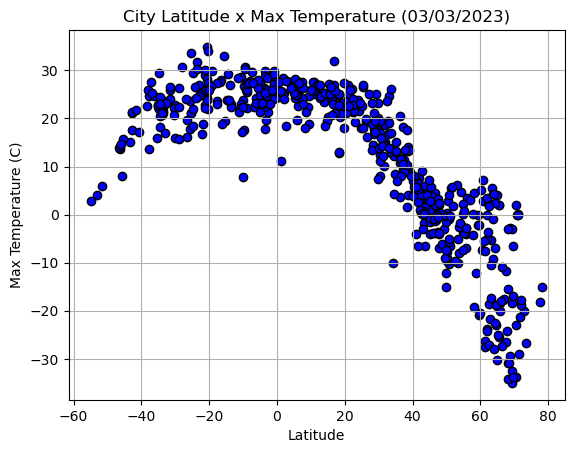

In [18]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

#xvalue = city_data_df.loc[city_data_df["Lat"]]
xvalue = city_data_df["Lat"]
temp_yvalue = city_data_df["Max Temp"]

today = pd.Timestamp("today").strftime("%m/%d/%Y")
#Timestamp('2015-10-14 00:00:00')
#today = to_datetime
plt.scatter(xvalue,temp_yvalue,edgecolors='k',color='b')
plt.grid()
plt.title(f"City Latitude x Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

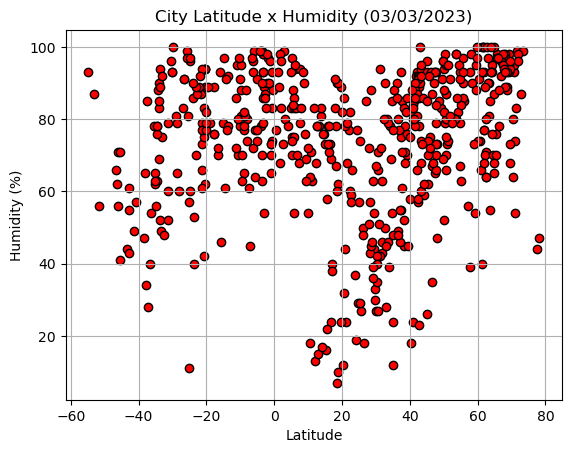

In [19]:
# Build the scatter plots for latitude vs. humidity
humidity_yvalue = city_data_df["Humidity"]
plt.scatter(xvalue,humidity_yvalue,edgecolors='k',color='r')
plt.grid()
plt.title(f"City Latitude x Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")


# Show plot
plt.show()

#### Latitude Vs. Cloudiness

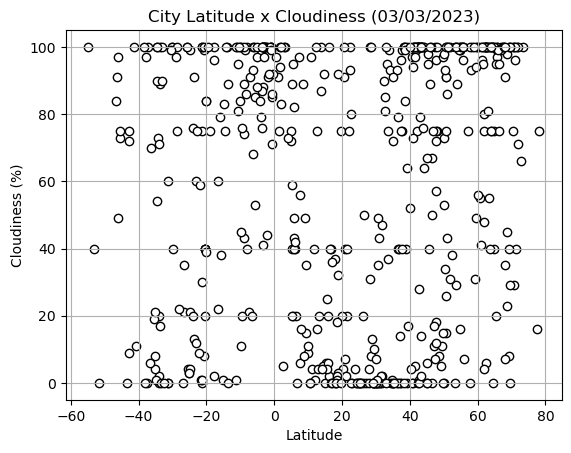

In [20]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
cloudy_yvalue = city_data_df["Cloudiness"]
plt.scatter(xvalue,cloudy_yvalue,edgecolors='k',color='w')
plt.grid()
plt.title(f"City Latitude x Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

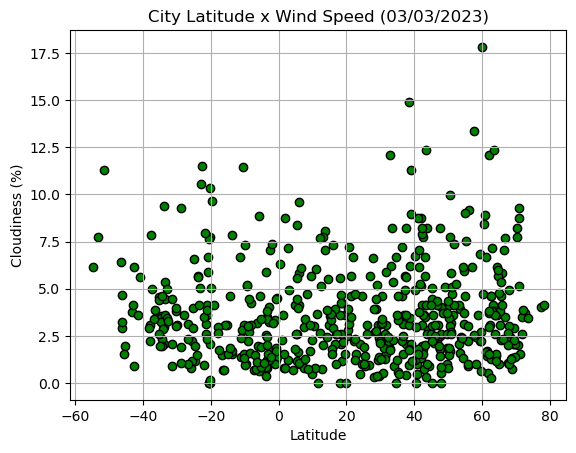

In [21]:
# Build the scatter plots for latitude vs. wind speed
windy_yvalue = city_data_df["Wind Speed"]
plt.scatter(xvalue,windy_yvalue,edgecolors='k',color='g')
plt.grid()
plt.title(f"City Latitude x Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:

# Define a function to create Linear Regression plots
#(slope,intercept,rvalue,pvalue,sterr) = stats.linregress(city_data_df["Lat"],city_data_df["Max Temp"])


# !! Skipping per instruction given by Dr. A 


city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,25.86,93,71,1.21,EC,1677896989
1,namibe,-15.1961,12.1522,19.42,79,1,3.08,AO,1677897051
2,ushuaia,-54.8000,-68.3000,2.81,93,100,6.17,AR,1677896981
3,hilo,19.7297,-155.0900,21.45,89,75,3.60,US,1677896976
4,cape town,-33.9258,18.4232,20.77,83,20,2.06,ZA,1677896993


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE


northern_lats = (city_data_df.loc[city_data_df["Lat"] >=0])

northern_hemi_df = pd.DataFrame(northern_lats)




# Show Record Count
print(northern_hemi_df.count())

    

# Display sample data
northern_hemi_df.head()

City          382
Lat           382
Lng           382
Max Temp      382
Humidity      382
Cloudiness    382
Wind Speed    382
Country       382
Date          382
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hilo,19.7297,-155.0900,21.45,89,75,3.60,US,1677896976
7,qasigiannguit,68.8193,-51.1922,-2.86,89,98,1.34,GL,1677897083
8,ormond beach,29.2858,-81.0559,25.13,63,0,3.09,US,1677897322
13,half moon bay,37.4636,-122.4286,11.34,75,0,8.23,US,1677897156
14,kapaa,22.0752,-159.3190,26.18,77,75,6.69,US,1677896906


In [24]:
southern_lats = (city_data_df.loc[city_data_df["Lat"]<=0])
southern_hemi_df = pd.DataFrame(southern_lats)
print(southern_hemi_df.count())
southern_hemi_df.head()

City          172
Lat           172
Lng           172
Max Temp      172
Humidity      172
Cloudiness    172
Wind Speed    172
Country       170
Date          172
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,25.86,93,71,1.21,EC,1677896989
1,namibe,-15.1961,12.1522,19.42,79,1,3.08,AO,1677897051
2,ushuaia,-54.8000,-68.3000,2.81,93,100,6.17,AR,1677896981
4,cape town,-33.9258,18.4232,20.77,83,20,2.06,ZA,1677896993
5,mahebourg,-20.4081,57.7000,25.70,94,40,0.00,MU,1677897071


###  Temperature vs. Latitude Linear Regression Plot

In [104]:
# Linear regression on Northern Hemisphere

(temp_slope,temp_intercept,temp_rvalue,temp_pvalue,temp_sterr) = stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
# N. Lat x Temp
(s_temp_slope,s_temp_intercept,s_temp_rvalue,s_temp_pvalue,s_temp_sterr) = stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
# S. Lat x Temp
(humid_slope,humid_intercept,humid_rvalue,humid_pvalue,humid_sterr) = stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
# N. Lat x Humidity
(s_humid_slope,s_humid_intercept,s_humid_rvalue,s_humid_pvalue,s_humid_sterr) = stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
# S. Lat x Humidity
(cloud_slope,cloud_intercept,cloud_rvalue,cloud_pvalue,cloud_sterr) = stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
# N. Lat x Cloudiness
(s_cloud_slope,s_cloud_intercept,s_cloud_rvalue,s_cloud_pvalue,s_cloud_sterr) = stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
# S. Lat x Cloudiness
(wind_slope,wind_intercept,wind_rvalue,wind_pvalue,wind_sterr) = stats.linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
# N. Lat x Wind Speed
(s_wind_slope,s_wind_intercept,s_wind_rvalue,s_wind_pvalue,s_wind_sterr) = stats.linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
# S. Lat x Wind Speed

y = -0.71x + 34.15


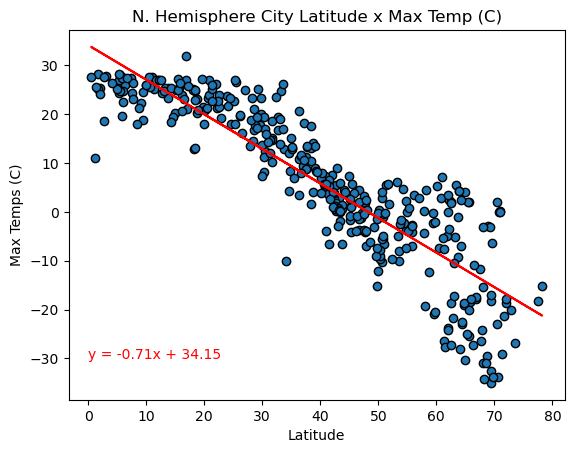

The r-value is: -0.8866764875976424


In [105]:
#Northern Hemisphere
northern_xval = northern_hemi_df["Lat"]
n_temp_yval = northern_hemi_df["Max Temp"]
plt.scatter(northern_xval,n_temp_yval,edgecolors='k')

temp_regressionvalues = northern_hemi_df["Lat"]*temp_slope+temp_intercept

lineEQ = f"y = {temp_slope:.2f}x + {temp_intercept:.2f}"
print(lineEQ)

plt.plot(northern_hemi_df["Lat"],temp_regressionvalues, "r-")
plt.annotate(lineEQ,(0,-30),color='red')
plt.title("N. Hemisphere City Latitude x Max Temp (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (C)")
plt.show()
print(f"The r-value is: {temp_rvalue}")

y = 0.19x + 27.30


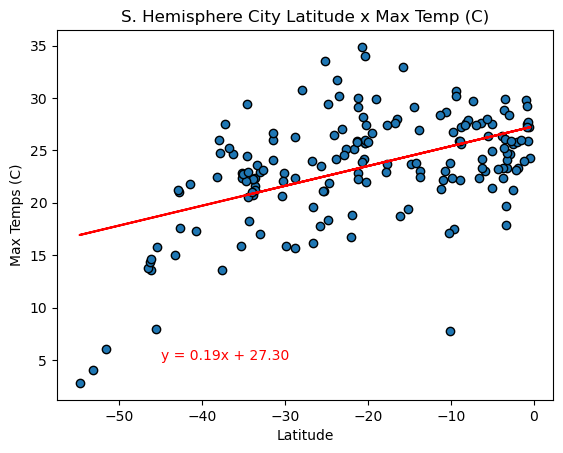

The r-value is: 0.5030088052504224


In [106]:
# Linear regression on Southern Hemisphere
southern_xval = southern_hemi_df["Lat"]
s_temp_yval = southern_hemi_df["Max Temp"]
plt.scatter(southern_xval,s_temp_yval,edgecolors='k')

s_temp_regressionvalues = southern_hemi_df["Lat"]*s_temp_slope+s_temp_intercept

lineEQ = f"y = {s_temp_slope:.2f}x + {s_temp_intercept:.2f}"
print(lineEQ)

plt.plot(southern_hemi_df["Lat"],s_temp_regressionvalues, "r-")
plt.annotate(lineEQ,(-45,5),color='red')
plt.title("S. Hemisphere City Latitude x Max Temp (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (C)")
plt.show()

print(f"The r-value is: {s_temp_rvalue}")

**Discussion about the linear relationship:** 
* There is a strong negative correlation between Northern Hemisphere temperatures & latitude 
* Where as somewhat of a positive correlation between Southern Hemisphere temperatures & latitude

## Humidity vs. Latitude 

y = 0.35x + 59.15


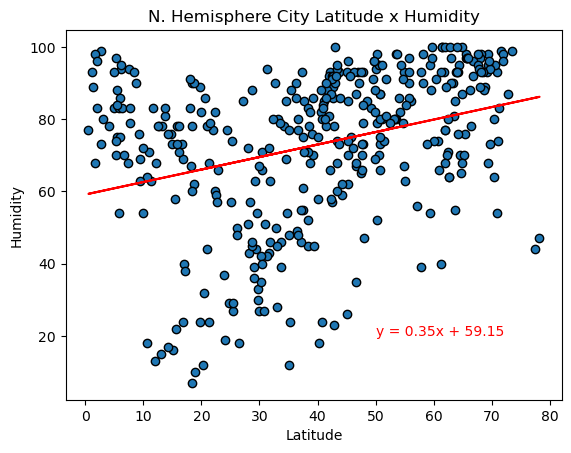

The r-value is: 0.3172766215017438


In [116]:
#Northern Hemisphere
n_humid_yval = northern_hemi_df["Humidity"]
plt.scatter(northern_xval,n_humid_yval,edgecolors='k')

humid_regressionvalues = northern_hemi_df["Lat"]*humid_slope+humid_intercept

lineEQ = f"y = {humid_slope:.2f}x + {humid_intercept:.2f}"
print(lineEQ)

plt.plot(northern_hemi_df["Lat"],humid_regressionvalues, "r-")
plt.annotate(lineEQ,(50,20),color='red')
plt.title("N. Hemisphere City Latitude x Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print(f"The r-value is: {humid_rvalue}")

y = 0.47x + 85.91


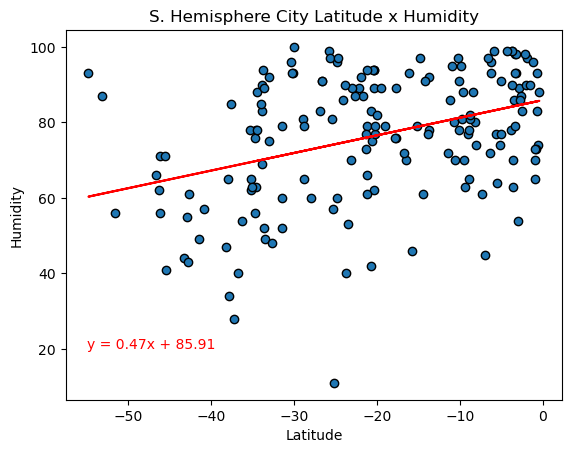

The r-value is: 0.3804848116861703


In [108]:
s_humid_yval = southern_hemi_df["Humidity"]
plt.scatter(southern_xval,s_humid_yval,edgecolors='k')

s_humid_regressionvalues = southern_hemi_df["Lat"]*s_humid_slope+s_humid_intercept

lineEQ = f"y = {s_humid_slope:.2f}x + {s_humid_intercept:.2f}"
print(lineEQ)

plt.plot(southern_hemi_df["Lat"],s_humid_regressionvalues, "r-")
plt.annotate(lineEQ,(-55,20),color='red')
plt.title("S. Hemisphere City Latitude x Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
print(f"The r-value is: {s_humid_rvalue}")

**Discussion about the linear relationship:** 
* There is a weak positive correlation between Northern Hemisphere humidity & latitude
* There is a weak positive correlation between Southern Hemisphere humidity & latitude


### Cloudiness vs. Latitude Linear Regression Plot

y = 0.70x + 27.93


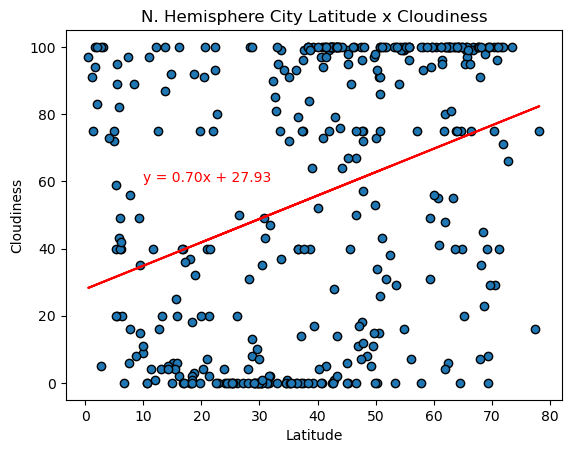

The r-value is: 0.3355587139240292


In [109]:
n_cloud_yval = northern_hemi_df["Cloudiness"]
plt.scatter(northern_xval,n_cloud_yval,edgecolors='k')

cloud_regressionvalues = northern_hemi_df["Lat"]*cloud_slope+cloud_intercept

lineEQ = f"y = {cloud_slope:.2f}x + {cloud_intercept:.2f}"
print(lineEQ)

plt.plot(northern_hemi_df["Lat"],cloud_regressionvalues, "r-")
plt.annotate(lineEQ,(10,60),color='red')
plt.title("N. Hemisphere City Latitude x Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print(f"The r-value is: {cloud_rvalue}")

y = 0.92x + 81.97


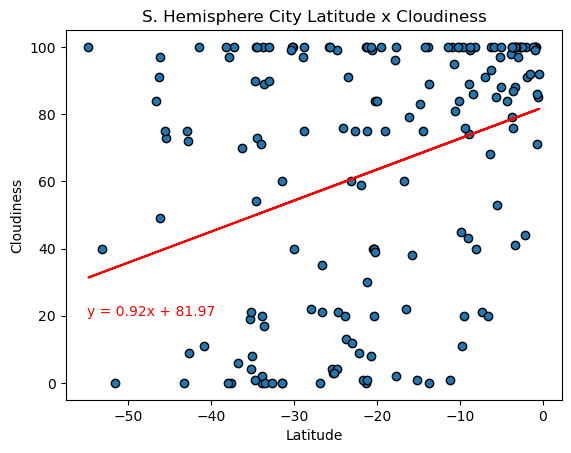

The r-value is: 0.3373939553356847


In [110]:
# Southern Hemisphere
s_cloud_yval = southern_hemi_df["Cloudiness"]
plt.scatter(southern_xval,s_cloud_yval,edgecolors='k')

s_cloud_regressionvalues = southern_hemi_df["Lat"]*s_cloud_slope+s_cloud_intercept

lineEQ = f"y = {s_cloud_slope:.2f}x + {s_cloud_intercept:.2f}"
print(lineEQ)

plt.plot(southern_hemi_df["Lat"],s_cloud_regressionvalues, "r-")
plt.annotate(lineEQ,(-55,20),color='red')
plt.title("S. Hemisphere City Latitude x Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
print(f"The r-value is: {s_cloud_rvalue}")

**Discussion about the linear relationship:**
* There is a weak positive correlation between Northern Hemisphere Cloudiness & latitude
* There is a weak positive correlation between Southern Hemisphere Cloudiness & latitude

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.01x + 3.15


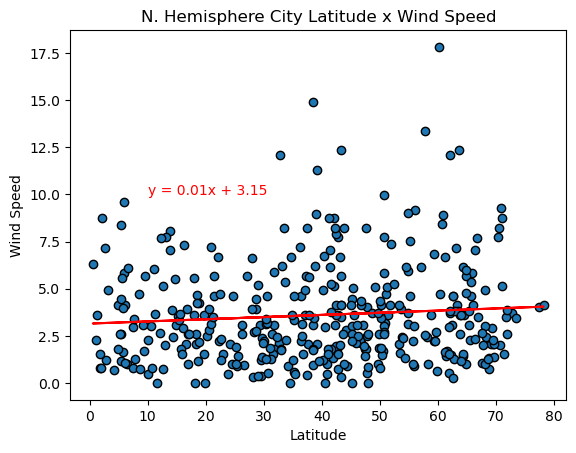

The r-value is: 0.08628020539787881


In [111]:
# Northern Hemisphere
n_wind_yval = northern_hemi_df["Wind Speed"]
plt.scatter(northern_xval,n_wind_yval,edgecolors='k')

wind_regressionvalues = northern_hemi_df["Lat"]*wind_slope+wind_intercept

lineEQ = f"y = {wind_slope:.2f}x + {wind_intercept:.2f}"
print(lineEQ)

plt.plot(northern_hemi_df["Lat"],wind_regressionvalues, "r-")
plt.annotate(lineEQ,(10,10),color='red')
plt.title("N. Hemisphere City Latitude x Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
print(f"The r-value is: {wind_rvalue}")

y = -0.04x + 2.65


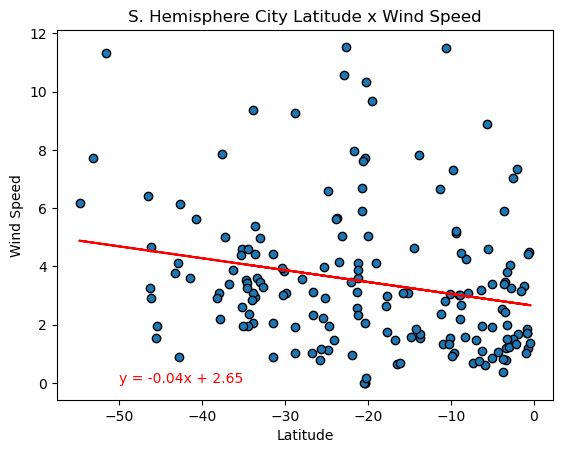

The r-value is: -0.23065648935872549


In [112]:
# Southern Hemisphere
s_wind_yval = southern_hemi_df["Wind Speed"]
plt.scatter(southern_xval,s_wind_yval,edgecolors='k')

s_wind_regressionvalues = southern_hemi_df["Lat"]*s_wind_slope+s_wind_intercept

lineEQ = f"y = {s_wind_slope:.2f}x + {s_wind_intercept:.2f}"
print(lineEQ)

plt.plot(southern_hemi_df["Lat"],s_wind_regressionvalues, "r-")
plt.annotate(lineEQ,(-50,0),color='red')
plt.title("S. Hemisphere City Latitude x Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
print(f"The r-value is: {s_wind_rvalue}")

**Discussion about the linear relationship:** 
* There is a very weak positive correlation between Northern Hemisphere humidity & latitude
* There is a very negative positive correlation between Southern Hemisphere humidity & latitude
* The rvalues are so weak for these 2, there is practically no relation found